# Ch03 Triple Barriers

In [78]:
import numpy as np 
import pandas as pd 

import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime
from matplotlib.patches import Rectangle
import  matplotlib.dates as mdates


from adv_finance import bars
from adv_finance import labeling
from adv_finance import utils




In [2]:
df = pd.read_csv("TRADE_A233740_2019_DV.csv")
df.timestamp = df.timestamp.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))
df = df.set_index('timestamp')


In [3]:
close = df[['open', 'high', 'low', 'close', 'vol']]
daily_vol = utils.get_daily_vol(close[['close']])
threshold = daily_vol['close'].mean() * 0.5


In [4]:
cusum_events = labeling.cusum_filter(df['close'], threshold)



In [5]:
vertical_barriers = labeling.add_vertical_barrier(t_events=cusum_events, close=df['close'], num_days=1)



In [20]:
pt_sl = [1, 2]
min_ret = 0.005
triple_barrier_events = labeling.get_events(close=df['close'],
                                            t_events=cusum_events,
                                            pt_sl=pt_sl,
                                            target=daily_vol['close'],
                                            min_ret=min_ret,
                                            num_threads=1,
                                            vertical_barrier_times=vertical_barriers,
                                            side_prediction=None)


/nfs/code/adv_finance/adv_finance/labeling/labeling.py:111: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  target = target.loc[t_events]


In [47]:
# df0 = df.loc['2019-03-05 09:00':'2019-03-05 10:00']
df0 = df.loc['2019-03-05']
triple_barrier_events = triple_barrier_events.loc['2019-03-05']


/opt/conda/envs/python372/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


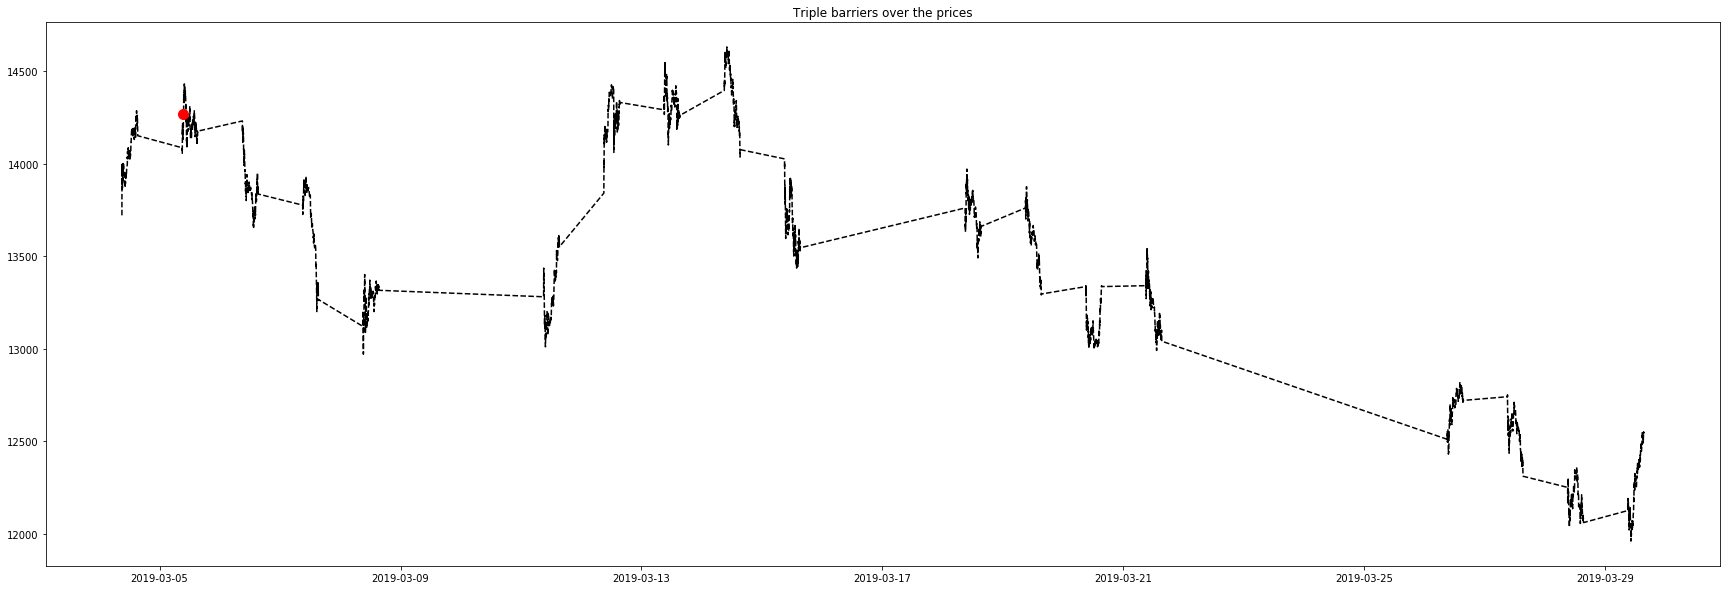

In [8]:
plt.figure(figsize=(30, 10))
plt.title('Triple barriers over the prices')
plt.plot(df.index.values, df.close.values, label='raw_prices', ls='--', color='black')
plt.plot(df_triple_barriers.index.values, df_triple_barriers.close.values, label='cusum_sample', ls='--', markersize=10, marker='o', color='red')
plt.show()

/opt/conda/envs/python372/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


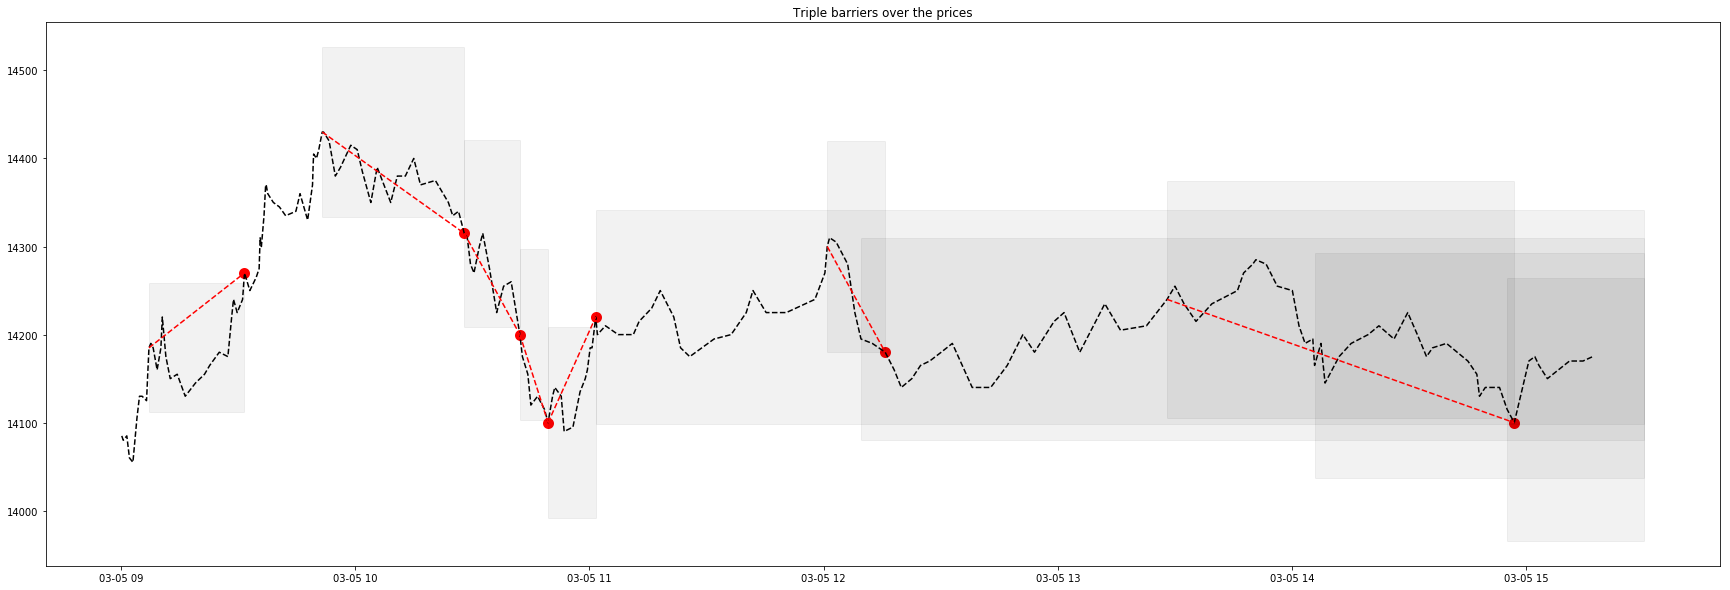

In [77]:
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111)

plt.title('Triple barriers over the prices')
plt.plot(df0.index.values, df0.close.values, label='raw_prices', ls='--', color='black')


# Draw barrier region 
for i in triple_barrier_events.itertuples(): 
    t0, t1, trgt = i.Index, i.t1, i.trgt
    
    t1 = min(t1, pd.Timestamp('2019-03-05 15:30'))
    
    x0 = mdates.date2num(t0)
    x1 = mdates.date2num(t1)
    w = x1 - x0 
    
    y0 = df0.loc[t0].close * (1 - trgt)
    y1 = df0.loc[t0].close * (1 + trgt)
    h = y1 - y0
    
    rect = Rectangle((x0, y0), w, h, color='black', alpha=0.05)
    ax.add_patch(rect)
    
    df1 = df0.loc[[t0, t1]].dropna()
    
    plt.plot(df1.index.values, df1.close.values, label='triple barrier', ls='--', color='red')
    if df1.shape[0] >= 2:
        plt.scatter(df1.index.values[1], df1.close.values[1], marker='o', linewidths=5, color='red')

plt.show()

# APPENDIX

In [ ]:
# # draw rect
# # start = mdates.date2num(df_triple_barriers.index[0])
# # end = mdates.date2num(df_triple_barriers.index[10]) + 1000000
# # width = end - start 
# # height = ax.get_ylim()[1] - ax.get_ylim()[0]
# # print(start, end, width)

# t0 = df_triple_barriers.index[0]
# t1 = df_triple_barriers.index[1]

# trgt = 0.005
# y0 = df_triple_barriers.loc[t0].close * (1 - trgt)
# y1 = df_triple_barriers.loc[t0].close * (1 + trgt)

# print(t0, t1)
# x0 = mdates.date2num(t0)
# x1 = mdates.date2num(t1)
# w = x1 - x0 
# h = y1 - y0


# print(x0, x1, y0, y1, w, h)
# rect = Rectangle((x0, y0), w, h, color='black', alpha=0.5)
# ax.add_patch(rect)

